### **Thực hành 4 phân vùng ảnh**
### 2. VIẾT CHƯƠNG TRÌNH PHÂN VÙNG ẢNH
#### 2.1 PHÂN VÙNG THEO HISTOGRAM
##### * Phương pháp otsu

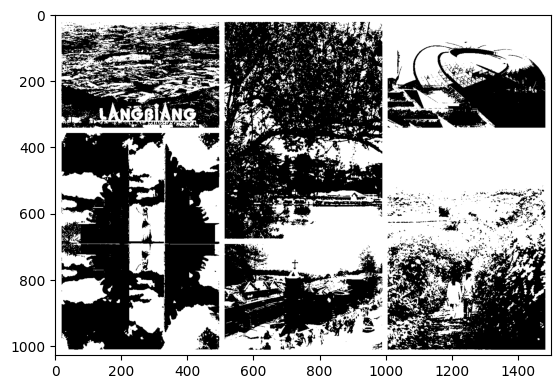

In [6]:
from PIL import Image 
import numpy as np
import imageio.v2 as iio 
import scipy.ndimage as nd 
import matplotlib.pylab as plt
from skimage.filters.thresholding import threshold_otsu

data = Image.open('dalat.jpg').convert('L')

a = np.asarray(data)

thres = threshold_otsu(a)

b = a > thres

b = Image.fromarray(b)

plt.imshow(b)
plt.show()

### Phương pháp Adaptive Thresholding

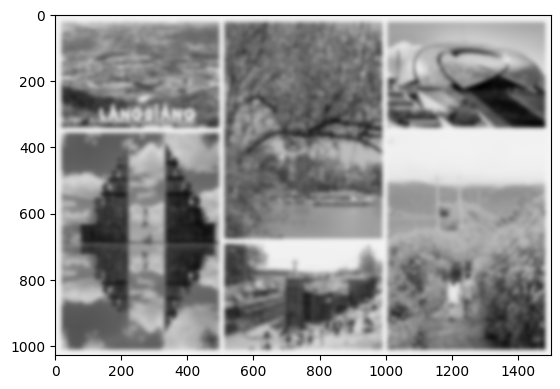

In [1]:
from PIL import Image 
import numpy as np
import imageio.v2 as iio 
import scipy.ndimage as nd 
import matplotlib.pylab as plt
from skimage.filters import threshold_local

data = Image.open('exercise\dalat.jpg').convert('L')
a = np.array(data)
b = threshold_local(a, 39, offset=10)
b = Image.fromarray(b)

plt.imshow(b)
plt.show()

#### **2.2 Phân vùng theo region**

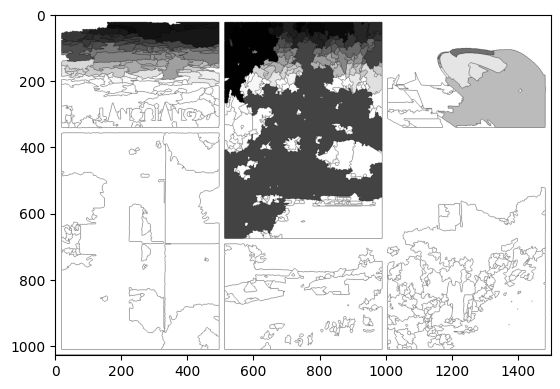

: 

In [ ]:
import cv2 
from PIL import Image 
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
from scipy.ndimage import label
import matplotlib.pylab as plt
from skimage.filters import threshold_local

data = cv2.imread('exercise\dalat.jpg')
a = cv2.cvtColor(data, cv2.COLOR_BGR2GRAY)
thresh, b1 = cv2.threshold(a, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
b2 = cv2.erode(b1, None, iterations = 2)
dist_trans = cv2.distanceTransform(b2, 2, 3)
thresh, dt = cv2.threshold(dist_trans, 1, 255, cv2.THRESH_BINARY)

labelled, ncc = label(dt)
labelled = labelled.astype(np.int32)

cv2.watershed(data, labelled)
b = Image.fromarray(labelled)

plt.imshow(b)
plt.show()


#### **2.3 Biến đổi đối tượng ảnh** 
##### **2.3.1 Sử dụng binary_dilation**

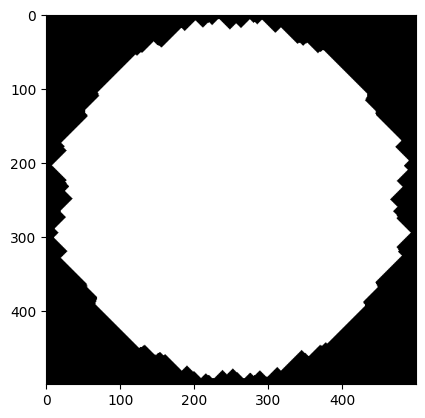

: 

In [ ]:
import cv2 
from PIL import Image 
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
from scipy.ndimage import label
import matplotlib.pylab as plt
from skimage.filters import threshold_local

data = Image.open('Ball.gif').convert('L')
b = nd.binary_dilation(data, iterations = 50)

c = Image.fromarray(b)
c.show()
plt.imshow(c)
plt.show()

##### **2.3.2 Sử dụng binary_opening**

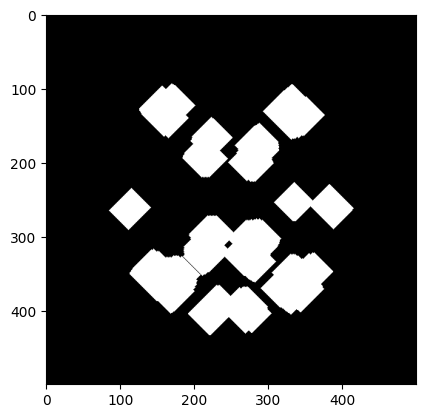

: 

In [ ]:
import cv2 
from PIL import Image 
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
from scipy.ndimage import label
import matplotlib.pylab as plt
from skimage.filters import threshold_local

data = Image.open('Ball.gif').convert('L')
s = [[0,1,0], [1,1,1], [0,1,0]]
b = nd.binary_opening(data, structure=s, iterations=25)

c = Image.fromarray(b)
c.show()
plt.imshow(c)
plt.show()

##### **2.3.3 Sử dụng binary_erosion**

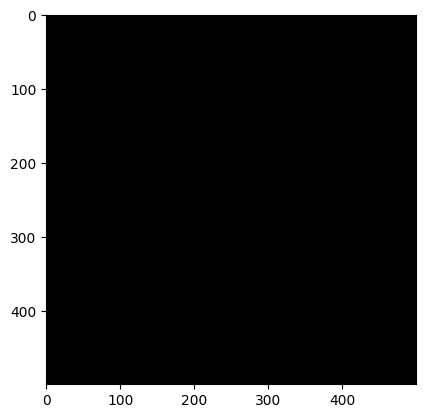

: 

In [ ]:
import cv2 
from PIL import Image 
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
from scipy.ndimage import label
import matplotlib.pylab as plt
from skimage.filters import threshold_local

data = Image.open('Ball.gif').convert('L')
s = [[0,1,0], [1,1,1], [0,1,0]]
b = nd.binary_erosion(data, structure=s, iterations=50)

c = Image.fromarray(b)
c.show()
plt.imshow(c)
plt.show()

##### **2.3.4 Sử dụng binary_closing**

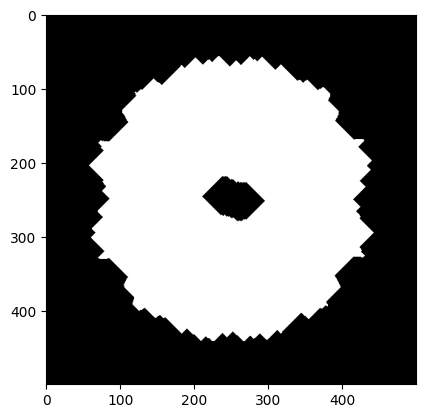

In [2]:
import cv2 
from PIL import Image 
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
from scipy.ndimage import label
import matplotlib.pylab as plt
from skimage.filters import threshold_local

data = Image.open('Ball.gif').convert('L')
s = [[0,1,0], [1,1,1], [0,1,0]]
b = nd.binary_closing(data, structure=s, iterations=25)

c = Image.fromarray(b)
c.show()
plt.imshow(c)
plt.show()

#### **3. BÀI TẬP**
##### 1. Viết chương trình chọn LangBiang trong ảnh Đà Lạt từ thư mục exercise. Tịnh tiến vùng chọn sang phải 100px. Sử dụng phương pháp Otsu để phân vùng LangBiang theo ngưỡng 0.3. Lưu vào máy với tên lang_biang.jpg và hiển thị trên màn hình.

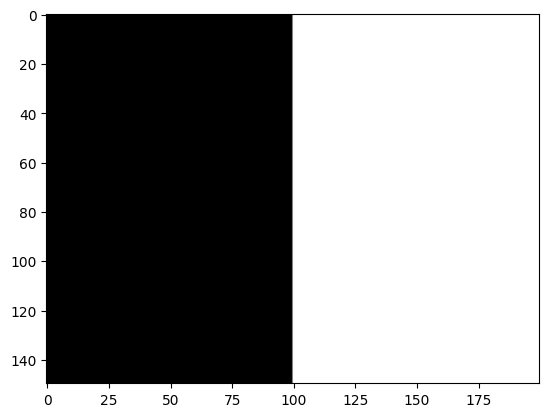

In [3]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import threshold_otsu

img = Image.open('exercise/dalat.jpg').convert('L')
a = np.array(img)
roi = a[50:200, 100:300]

shifted = np.zeros_like(roi)
if roi.shape[1] + 100 < a.shape[1]:
    shifted[:, 100:] = roi[:, :-100]
else:
    shifted[:, 100:] = roi[:, :-100]

thres = threshold_otsu(shifted)
mask = shifted > (0.3 * thres)

out = Image.fromarray((mask * 255).astype(np.uint8))
out.save('lang_biang.jpg')
plt.imshow(out, cmap='gray')
plt.show()

##### 2. Viết chương trình chọn Hồ Xuân Hương trong ảnh Đà Lạt từ thư mục exercise. Xoáy đổi đối tượng vừa chọn 1 góc 45' và dùng phương pháp Adaptive Thresholding với ngưỡng 60 và lưu với máy với tên là ho_xuan_huong.jpg

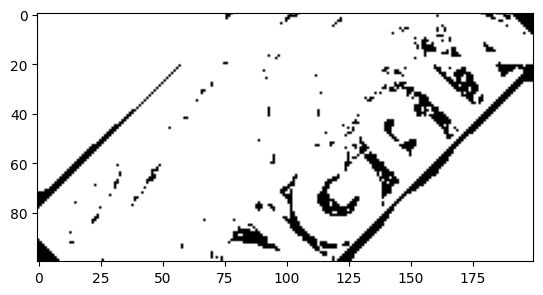

In [4]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as nd
from skimage.filters import threshold_local

img = Image.open('exercise/dalat.jpg').convert('L')
a = np.array(img)
roi = a[220:320, 150:350]

rotated = nd.rotate(roi, 45, reshape=False)

thresh_img = threshold_local(rotated, 39, offset=60)
mask = rotated > thresh_img

out = Image.fromarray((mask * 255).astype(np.uint8))
out.save('ho_xuan_huong.jpg')
plt.imshow(out, cmap='gray')
plt.show()

##### 3. Viết chương trình chọn Quảng trường Lâm Viên trong ảnh Đà Lạt trong mục exercise. Dùng phương phá Coordinate Mappng và Binary Closing cho vùng vừa chọn. Lưu vào máy với tên là quan_truong_lam_vien.jpg

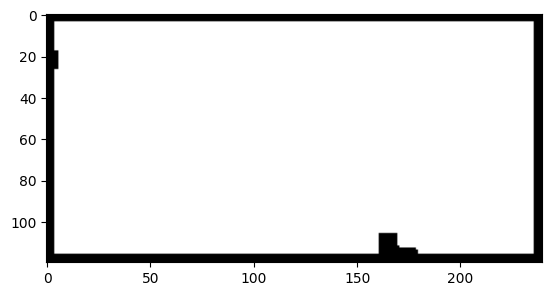

In [6]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as nd

img = Image.open('exercise/dalat.jpg').convert('L')
a = np.array(img)
roi = a[320:420, 200:400]

scaled = nd.zoom(roi, 1.2)
mask = scaled > 100

closed = nd.binary_closing(mask, structure=np.ones((5,5)), iterations=2)

out = Image.fromarray((closed * 255).astype(np.uint8))
out.save('quan_truong_lam_vien.jpg')
plt.imshow(out, cmap='gray')
plt.show()

##### 4. Viết chương trình cho người dùng nhập chức năng xử lý.

1. geometric_transformation
2. segment
3. Kết hợp cả hai
1. Coordinate Mapping
2. Rotate
3. Scale
4. Shift
1. Adaptive Thresholding
2. Binary Dilation
3. Binary Erosion
4. Otsu


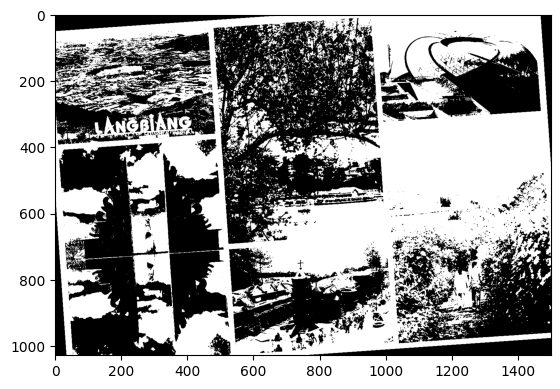

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import scipy.ndimage as nd
from skimage.filters import threshold_local, threshold_otsu

def geometric_transformation(img):
    print("1. Coordinate Mapping\n2. Rotate\n3. Scale\n4. Shift")
    choice = int(input("Chọn phép biến đổi: "))
    if choice == 2:
        angle = float(input("Nhập góc xoay: "))
        return nd.rotate(img, angle, reshape=False)
    elif choice == 3:
        scale = float(input("Nhập hệ số scale: "))
        return nd.zoom(img, scale)
    elif choice == 4:
        dx = int(input("Nhập số pixel dịch phải: "))
        dy = int(input("Nhập số pixel dịch xuống: "))
        return nd.shift(img, (dy, dx))
    else:
        print("Chưa hỗ trợ phép này.")
        return img

def segment(img):
    print("1. Adaptive Thresholding\n2. Binary Dilation\n3. Binary Erosion\n4. Otsu")
    choice = int(input("Chọn phép phân vùng: "))
    if choice == 1:
        block = int(input("Nhập block size: "))
        offset = int(input("Nhập offset: "))
        thresh_img = threshold_local(img, block, offset=offset)
        return img > thresh_img
    elif choice == 2:
        return nd.binary_dilation(img, iterations=5)
    elif choice == 3:
        return nd.binary_erosion(img, iterations=5)
    elif choice == 4:
        thres = threshold_otsu(img)
        return img > thres
    else:
        print("Chưa hỗ trợ phép này.")
        return img

img = np.array(Image.open('exercise/dalat.jpg').convert('L'))
print("1. geometric_transformation\n2. segment\n3. Kết hợp cả hai")
main_choice = int(input("Chọn chức năng: "))

if main_choice == 1:
    result = geometric_transformation(img)
elif main_choice == 2:
    result = segment(img)
elif main_choice == 3:
    temp = geometric_transformation(img)
    result = segment(temp)
else:
    result = img

plt.imshow(result, cmap='gray')
plt.show()